# Advanced Regression Assignment

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Advanced-Regression-Assignment" data-toc-modified-id="Advanced-Regression-Assignment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Advanced Regression Assignment</a></span></li><li><span><a href="#Step-2-EDA-and-Data-Preparation" data-toc-modified-id="Step-2-EDA-and-Data-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step 2 EDA and Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Imputing-Null-value" data-toc-modified-id="Imputing-Null-value-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Imputing Null value</a></span></li><li><span><a href="#Exploring-the-categorical-variables" data-toc-modified-id="Exploring-the-categorical-variables-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exploring the categorical variables</a></span></li><li><span><a href="#Exploring-the-numerical-variables-and-removing-statistical-outliers" data-toc-modified-id="Exploring-the-numerical-variables-and-removing-statistical-outliers-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Exploring the numerical variables and removing statistical outliers</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-year-columns" data-toc-modified-id="Dealing-with-year-columns-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Dealing with year columns</a></span></li><li><span><a href="#Checking-the-distribution-for-target-variable" data-toc-modified-id="Checking-the-distribution-for-target-variable-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Checking the distribution for target variable</a></span></li></ul></li><li><span><a href="#One-hot-encoding-the-categorical-variables" data-toc-modified-id="One-hot-encoding-the-categorical-variables-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>One hot encoding the categorical variables</a></span></li><li><span><a href="#Test-train-split-and-Feature-scalling" data-toc-modified-id="Test-train-split-and-Feature-scalling-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Test-train split and Feature scalling</a></span><ul class="toc-item"><li><span><a href="#Feature-Scaling-in-Training-set" data-toc-modified-id="Feature-Scaling-in-Training-set-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Feature Scaling in Training set</a></span></li></ul></li></ul></li><li><span><a href="#Step-3-Model-Building-and-Feature-Selections" data-toc-modified-id="Step-3-Model-Building-and-Feature-Selections-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Step 3 Model Building and Feature Selections</a></span><ul class="toc-item"><li><span><a href="#Feature-selection-using-RFE" data-toc-modified-id="Feature-selection-using-RFE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Feature selection using RFE</a></span></li><li><span><a href="#Tranforming-test-dataset" data-toc-modified-id="Tranforming-test-dataset-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tranforming test dataset</a></span></li><li><span><a href="#Ridge-and-Lasso-Regression" data-toc-modified-id="Ridge-and-Lasso-Regression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Ridge and Lasso Regression</a></span><ul class="toc-item"><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Ridge Regression</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-tuning-for-ridge-regression" data-toc-modified-id="Hyperparameter-tuning-for-ridge-regression-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span>Hyperparameter tuning for ridge regression</a></span></li></ul></li><li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Lasso Regression</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-tuning-for-Lasso-regression" data-toc-modified-id="Hyperparameter-tuning-for-Lasso-regression-3.3.2.1"><span class="toc-item-num">3.3.2.1&nbsp;&nbsp;</span>Hyperparameter tuning for Lasso regression</a></span></li></ul></li></ul></li><li><span><a href="#Observing-the-coefficients-obtained-from-both-ridge-and-lasso" data-toc-modified-id="Observing-the-coefficients-obtained-from-both-ridge-and-lasso-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Observing the coefficients obtained from both ridge and lasso</a></span></li></ul></li></ul></div>

In [556]:
# import the relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [557]:
# read the dataset

df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Insights and Observations**
- Majority of the columns have object data type because they are categorical variables based on data dictionary
- There are variables having lot of missing values which needs to be treated


In [559]:
# statistical summary  of the data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Step 2 EDA and Data Preparation

## Imputing Null value

In [560]:
percentageofnullvalues=round(df.isnull().sum()/df.shape[0]*100,2)
percentageofnullvalues.sort_values(ascending = False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [561]:
percentageofnullvalues[percentageofnullvalues>0].sort_values(ascending = False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [562]:
# Replacing the null values for these categorical variables by 'NA' 
col1 = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond'
       ,'BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType']
for col in col1:
    df[col].replace(np.NaN,'NA',inplace=True)

In [563]:
# Replacing null values with mean for numerical variables and mode for categorical variables
col2 = ['LotFrontage','MasVnrArea']
col3 = ['GarageYrBlt','Electrical']

for col in col2:
    df[col].replace(np.NaN,df[col].mean(),inplace=True)
    
for col in col3:
    df[col].replace(np.NaN,df[col].mode()[0],inplace=True)

In [564]:
# Checking if any null values are present in df
percentageofnullvalues=round(df.isnull().sum()/df.shape[0]*100,2)
percentageofnullvalues.sort_values(ascending = False)
percentageofnullvalues[percentageofnullvalues>0].sort_values(ascending = False)

Series([], dtype: float64)

In [565]:
# Dropping columns having more than 80% NA value since they are showing low variability

df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

## Exploring the categorical variables

In [566]:
df_categorical = df.select_dtypes(exclude=['float64','int64'])

In [567]:
df_categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [568]:
# Function to plot multiple bar charts by percentage
def pltpercent(r,c,columns,rot=45):
    for i,col in zip(range(1,(r*c)+1),columns):
        plt.subplot(r,c,i)
        temp = df[col].value_counts(normalize = True).mul(100)
        df_1 = pd.DataFrame({'labels': temp.index,'values': temp.values})
        plt.title('% Distribution of Catgeories in '+col+ ' Feature',size=10,color='Green')
        sns.barplot(x="labels",y="values",data=df_1)
        plt.xticks(rotation=rot)
        plt.tight_layout(pad=1.0)

In [569]:
# Function to plot multiple bar charts by counts
def pltvar(r,c,columns,rot=45):
    for i,col in zip(range(1,(r*c)+1),columns):
        plt.subplot(r,c,i)
        plt.title('Distribution of Catgeories in '+col+ ' Feature',size=10,color='Green')
        sns.countplot(x=col,data=df)
        plt.xticks(rotation=rot)
        plt.tight_layout(pad=1.0)

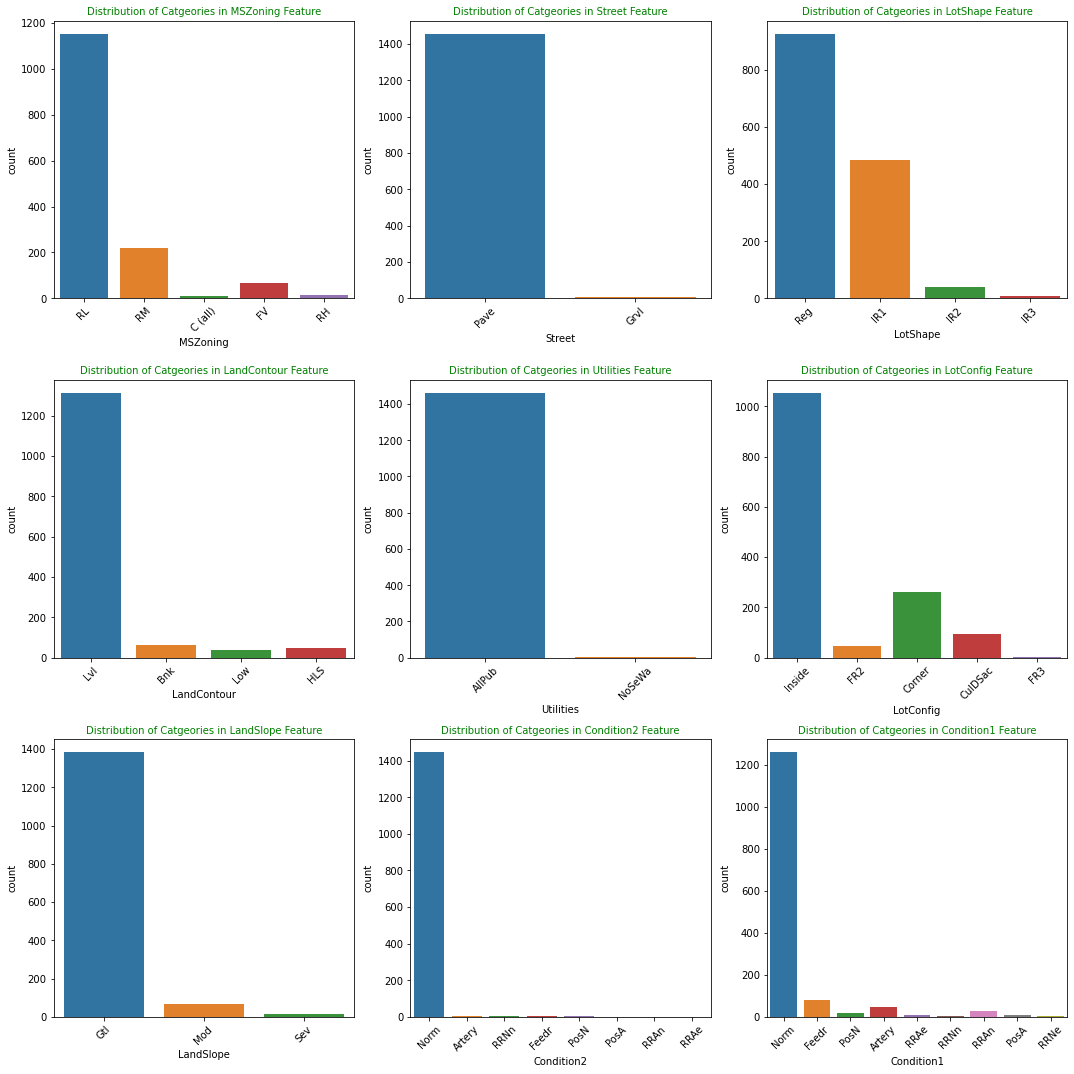

In [570]:
cat_col1=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition2', 'Condition1']
plt.figure(figsize=(15,15))
pltvar(3,3,cat_col1)

**Insights and Observations**

- Some of the categorical variables are skewed to one particular category (>90%) and should be removed 
- Some variables can be treated such that lower categories can be bucketed together

In [571]:
# Dropping skewed variables
df.drop(['Street','Utilities','LandSlope','Condition2'],axis=1,inplace=True)

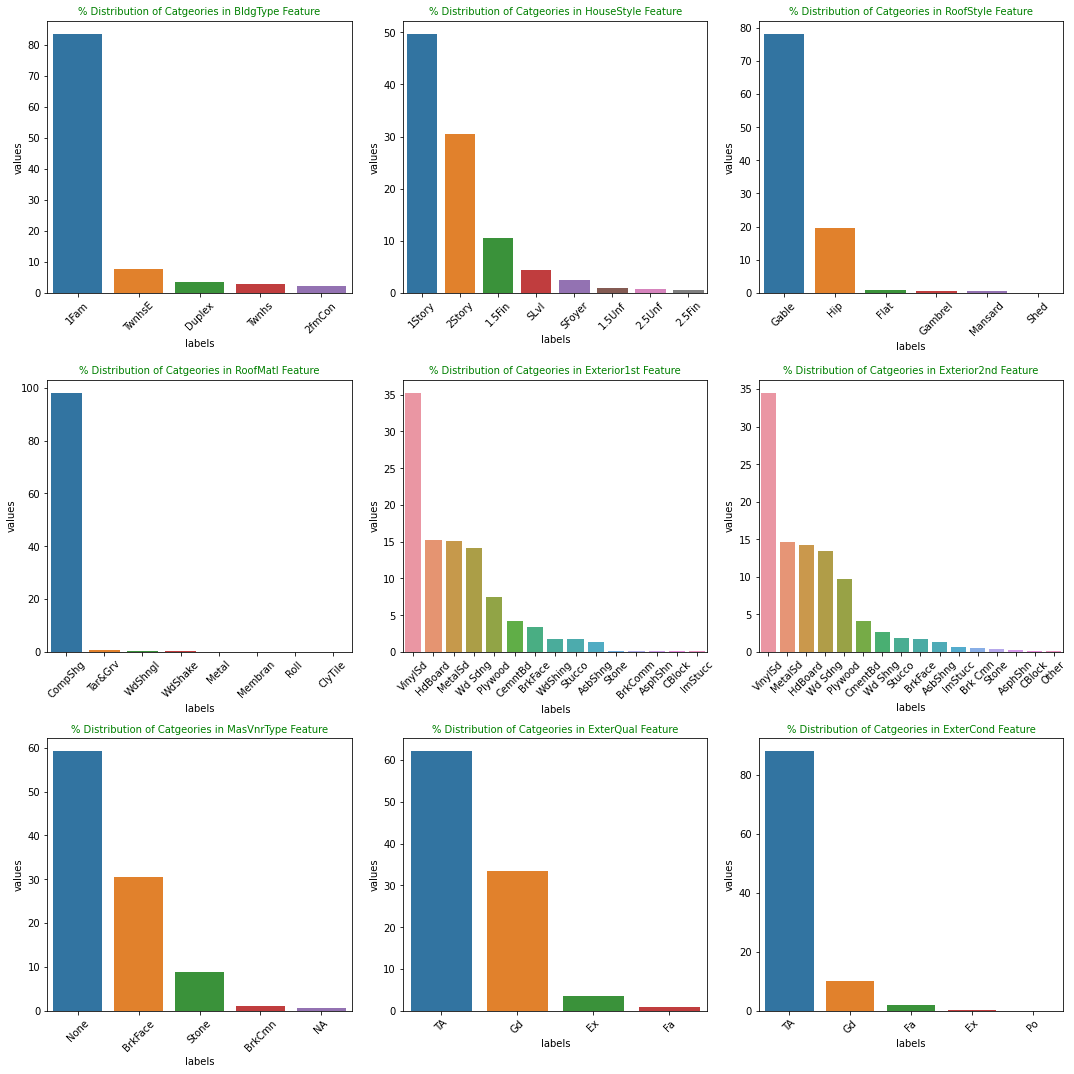

In [572]:
cat_col2=['BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond']
plt.figure(figsize=(15,15))
pltpercent(3,3,cat_col2)

In [573]:
# Dropping skewed variables
df.drop(['RoofMatl'],axis=1,inplace=True)

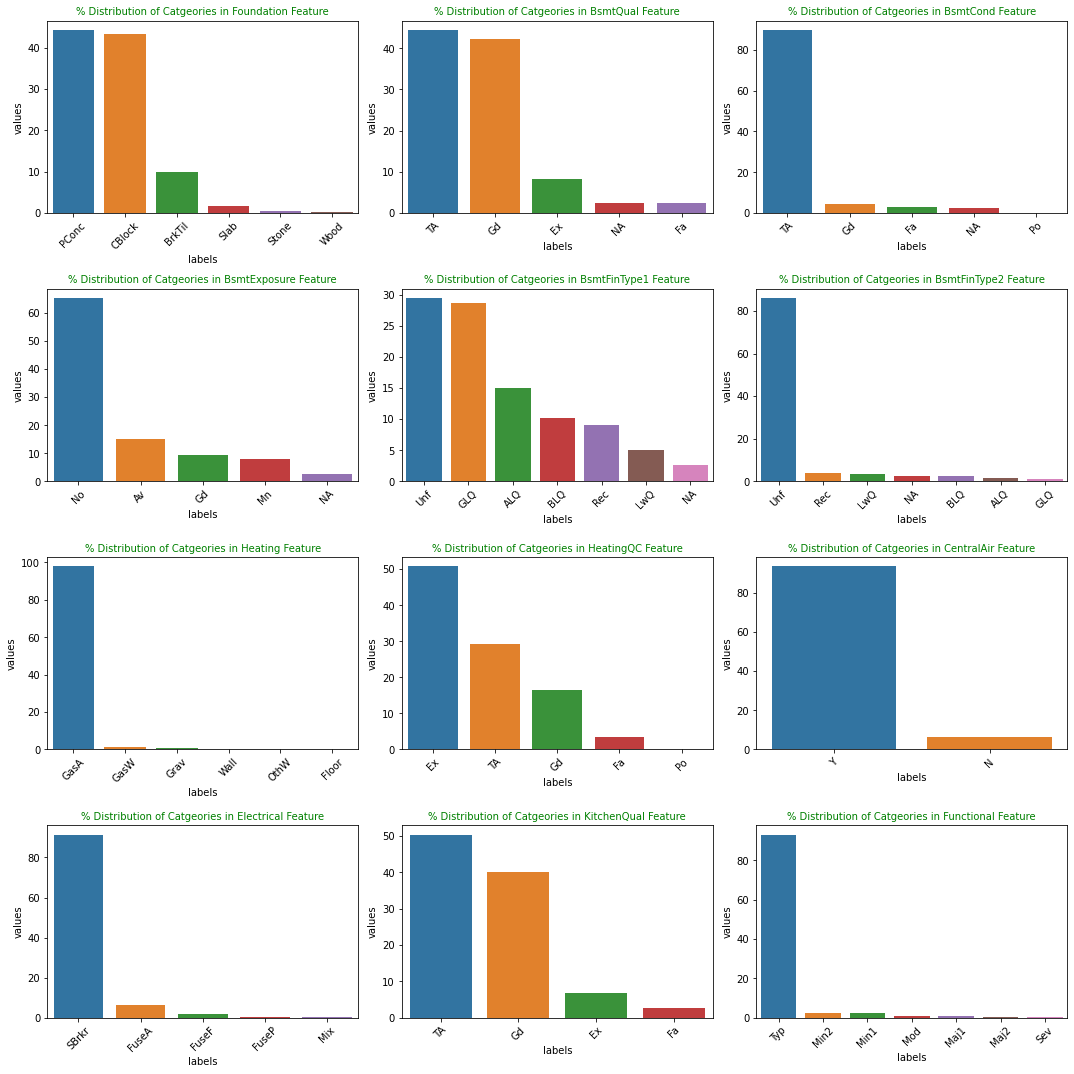

In [574]:
cat_col2=['Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional']
plt.figure(figsize=(15,15))
pltpercent(4,3,cat_col2)

In [575]:
# Dropping skewed variables
df.drop(['Heating'],axis=1,inplace=True)

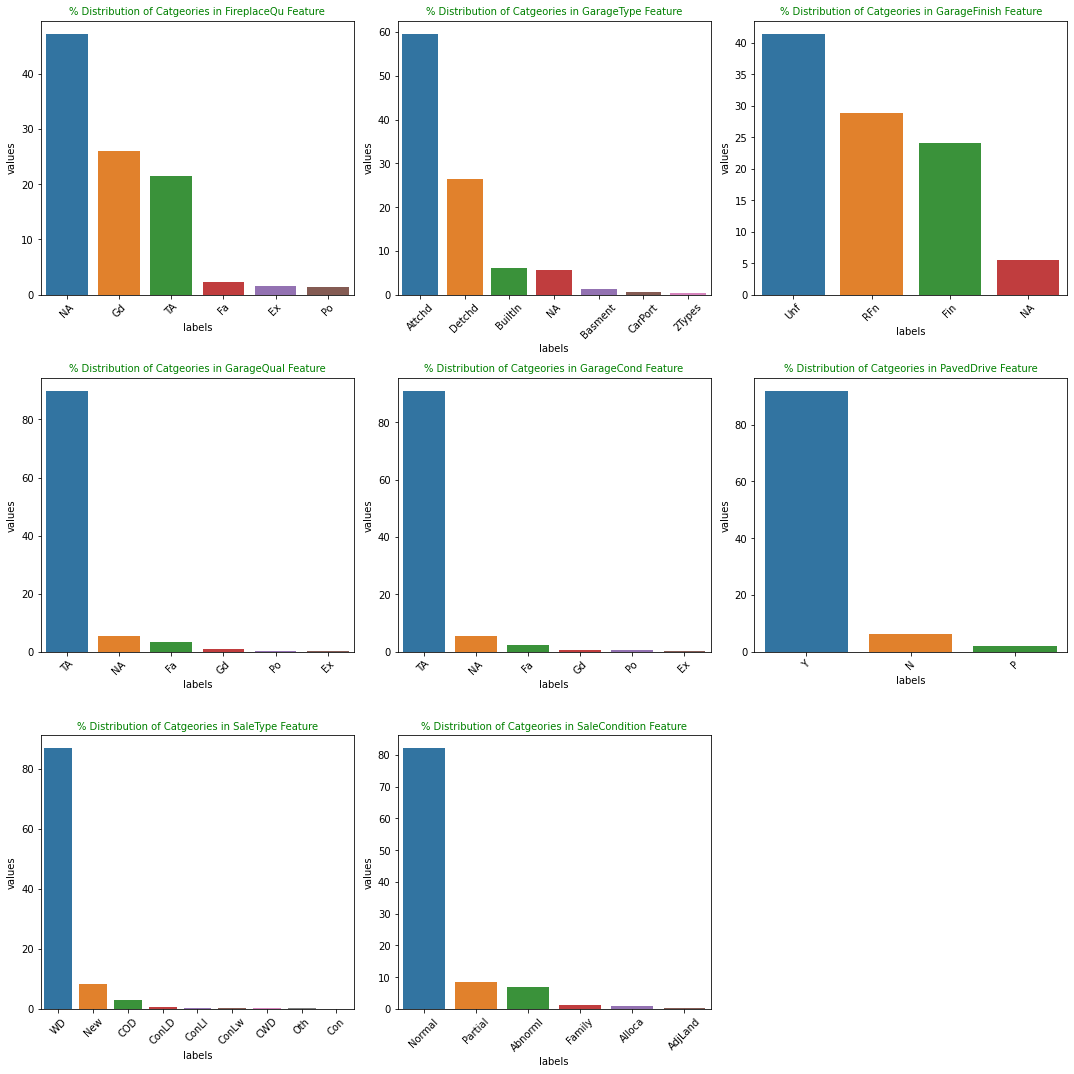

In [576]:
cat_col4=['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
plt.figure(figsize=(15,15))
pltpercent(3,3,cat_col4)  

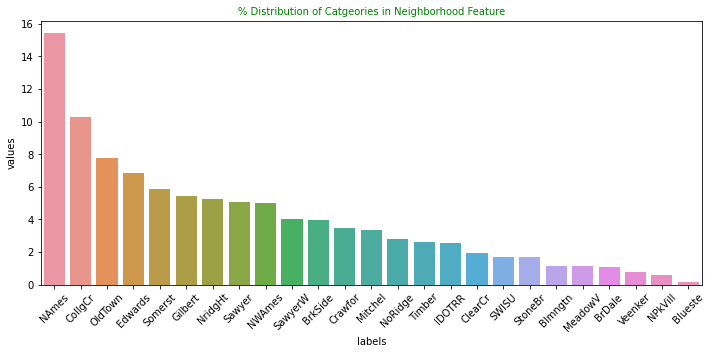

In [577]:
plt.figure(figsize=(10,5))
pltpercent(1,1,['Neighborhood'])

**Insights and Observations**

- No variable seems to have any category skewed (>90%) values so we don't need to drop any

## Exploring the numerical variables and removing statistical outliers


In [578]:
df_numerical = df.select_dtypes(exclude=['object'])

In [579]:
df_numerical.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [580]:
# ID is not a useful variable and can be dropped
df.drop(['Id'],axis=1,inplace=True)

### Dealing with year columns

- Year built is important variable compared to other three year columns can be dropped

In [581]:
# Calculating the ages of the houses in current year
df['house_age'] = df['YearBuilt'].apply(lambda x:2021-x)

In [582]:
# Checking if above operation was successfully performed
df[['house_age','YearBuilt']].head()

,house_age,YearBuilt
0,18,2003
1,45,1976
2,20,2001
3,106,1915
4,21,2000


In [583]:
# Removing all the year columns from df
df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

In [584]:
# Refreshing the number of numerical variables in df post removing columns
df_numerical = df.select_dtypes(exclude=['object'])
df_numerical.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice', 'house_age'],
      dtype='object')

In [585]:
# Removing the following categorical variables from the list
cat_cols = ['MSSubClass','MoSold','BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
'TotRmsAbvGrd','Fireplaces','GarageCars','OverallQual','OverallCond']
df_numerical.drop(cat_cols,axis=1,inplace=True)

In [586]:
df_numerical.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice',
       'house_age'],
      dtype='object')

### Checking the distribution for target variable

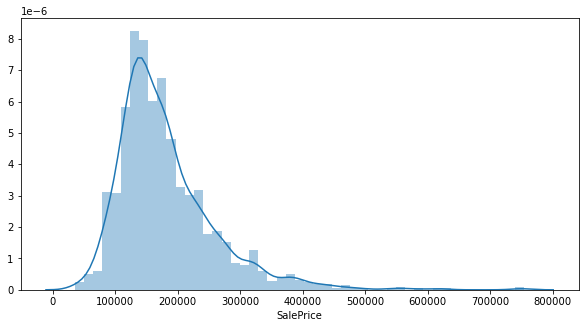

In [587]:
### Checking the distribution of target variable
plt.figure(figsize=(10,5))
sns.distplot(df.SalePrice)
plt.show()

**Insights and Observations**

- The variable is normally distributed but is skewed toward the left because of houses having extremely high prices.
- We can use log transform to treat the skewedness

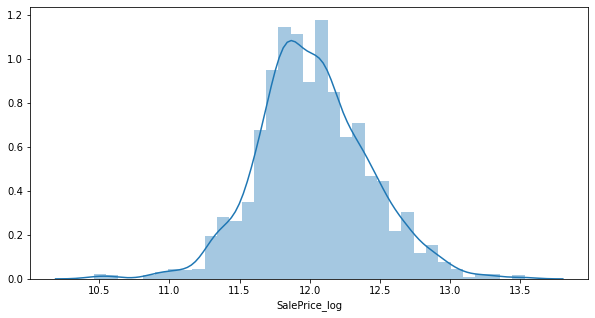

In [588]:
# Using log transformation
df['SalePrice_log'] = np.log(df['SalePrice'])
plt.figure(figsize=(10,5))
sns.distplot(df.SalePrice_log)
plt.show()

**Insights and Observations**

- The variable is now normally distributed and will be used as target variable

In [589]:
#Dropping the old target variable 
df.drop(['SalePrice'],axis=1,inplace=True)

## One hot encoding the categorical variables

In [590]:
# refreshing the categorical variable post removing some columns
df_categorical = df.select_dtypes(exclude=['float64','int64'])
df_categorical.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [591]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition','MSSubClass','MoSold','BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
'TotRmsAbvGrd','Fireplaces','GarageCars']], drop_first=True)

# Adding the results to the master dataframe
df_refined = pd.concat([df, dummy1], axis=1)

df_refined.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,0,0,0,0,1,0,0,0,1,0


In [592]:
## Dropping the columns for whom dummy variables have been created

col = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition','MSSubClass','MoSold','BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd','Fireplaces','GarageCars']
df_refined.drop(col,axis=1,inplace=True)
df_refined.columns


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=211)

## Test-train split and Feature scalling

In [593]:
from sklearn.model_selection import train_test_split

In [594]:
# Putting feature variable to X
X = df_refined.drop(['SalePrice_log'], axis=1)

X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [595]:
# Putting response variable to y
y = df_refined['SalePrice_log']

y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice_log, dtype: float64

In [596]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size = 0.2,random_state=42)

### Feature Scaling in Training set

In [597]:
from sklearn.preprocessing import MinMaxScaler

In [598]:
# Scaling the numerical variables
scaler = MinMaxScaler()

X_train[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'house_age']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'house_age']])

X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,0.167808,0.033186,5,6,0.000000,0.163359,0.0,0.167808,0.215057,0.224874,...,0,0,0,0,1,0,0,0,1,0
1066,0.130137,0.030555,6,7,0.000000,0.000000,0.0,0.342038,0.130769,0.106700,...,0,0,0,0,1,0,0,0,1,0
638,0.157534,0.034948,5,7,0.000000,0.000000,0.0,0.340753,0.130278,0.106012,...,0,0,0,0,1,0,0,0,1,0
799,0.133562,0.027577,5,7,0.182874,0.100815,0.0,0.069349,0.119640,0.148463,...,0,0,0,0,1,0,0,0,1,0
380,0.099315,0.017294,5,6,0.000000,0.038625,0.0,0.345890,0.167921,0.158788,...,0,0,0,0,1,0,0,0,1,0


# Step 3 Model Building and Feature Selections

## Feature selection using RFE


In [599]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [600]:
# running RFE with number of features=50

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=50
         )             
rfe = rfe.fit(X_train, y_train)

In [601]:
# tuples of (feature name, whether selected, ranking)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 79),
 ('MasVnrArea', False, 65),
 ('BsmtFinSF1', False, 7),
 ('BsmtFinSF2', False, 10),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 17),
 ('EnclosedPorch', False, 18),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', False, 119),
 ('house_age', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 98),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 143),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', True, 1),
 ('LandContour_Lvl', True, 1),
 ('LotConfig_CulDSac', False, 85),
 ('LotConfig_FR2', False, 80),
 ('LotConfig_FR3', False, 59),
 ('LotConfig_Inside', False, 123

In [602]:
# Storing the relevant 50 columns post RFE
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'house_age',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_RRNn', 'BldgType_TwnhsE', 'Exterior1st_BrkComm',
       'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA',
       'BsmtExposure_NA', 'BsmtFinType1_NA', 'BsmtFinType2_NA', 'CentralAir_Y',
       'Functional_Maj2', 'Functional_Mod', 'Functional_Sev',
       'GarageType_Attchd', 'GarageType_BuiltIn', 'SaleType_Con',
       'SaleCondition_Alloca'],
      dtype='o

**Insights and Observations**

- Selected top 50 variables using RFE and now running first a simple linear regression

## Tranforming test dataset

In [603]:
# Keeping only 50 features from RFE

X_train = X_train[col]

# transforming X test data set

X_test[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'house_age']] = scaler.transform(X_test[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'house_age']])

X_test=X_test[col]

X_test.head()

,LotFrontage,LotArea,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,...,BsmtFinType1_NA,BsmtFinType2_NA,CentralAir_Y,Functional_Maj2,Functional_Mod,Functional_Sev,GarageType_Attchd,GarageType_BuiltIn,SaleType_Con,SaleCondition_Alloca
892,0.167808,0.033252,6,0.169521,0.173322,0.168426,0.000000,0.0,0.138282,0.186178,...,0,0,1,0,0,0,1,0,0,0
1105,0.263699,0.051209,8,0.184503,0.239444,0.267554,0.543341,0.0,0.431047,0.502116,...,0,0,1,0,0,0,1,0,0,0
413,0.119863,0.035804,5,0.431507,0.164975,0.159247,0.000000,0.0,0.130746,0.253879,...,0,0,1,0,0,0,0,0,0,0
522,0.099315,0.017294,6,0.258990,0.164321,0.153740,0.319613,0.0,0.250565,0.296192,...,0,0,1,0,0,0,0,0,0,0
1036,0.232877,0.054210,9,0.255993,0.265139,0.295089,0.000000,0.0,0.242276,0.643159,...,0,0,1,0,0,0,1,0,0,0


## Ridge and Lasso Regression


### Ridge Regression

#### Hyperparameter tuning for ridge regression

In [604]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [605]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.3}


In [606]:
#Fitting Ridge model for alpha = 0.3 and printing coefficients which have been penalised
alpha = 0.3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.14496126  0.42348567  0.09050518 -0.11820138  0.16458938  0.65200059
  0.19780493  0.13173815  0.62645818  0.29488017  0.12577099  0.13262188
  0.16092627 -0.25548373 -0.28394808  0.26307709  0.18230026  0.20418011
  0.1679045  -0.1515259   0.14608127  0.08993406  0.08732064 -0.10257365
 -0.23756526  0.10560661  0.17775071 -0.18196335  0.10422828  0.14095654
  0.15447372  0.13471546  0.08191857 -0.07363934 -0.2733272  -0.17954615
 -0.09648819 -0.22374179 -0.10379054 -0.04239745 -0.04239745 -0.04239745
  0.10230267 -0.28211384 -0.08379445 -0.35362342  0.05288653  0.04591322
  0.1047095   0.14124198]


In [607]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 using training data is {}".format(r2_train_lr))

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 using test data is {}".format(r2_test_lr))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss using training data is {}".format(rss1_lr))

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss using test data is {}".format(rss2_lr))

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse using test data is {}".format(mse_train_lr))

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse using test data is {}".format(mse_test_lr))

# Building list of all metrics
metric2 = []
metric2.append(r2_train_lr)
metric2.append(r2_test_lr)
metric2.append(rss1_lr)
metric2.append(rss2_lr)
metric2.append(mse_train_lr)
metric2.append(mse_train_lr)

r2 using training data is 0.8706111356427385
r2 using test data is 0.8801283646829811
rss using training data is 23.0383401351937
rss using test data is 6.5319429405541545
mse using test data is 0.019724606280131594
mse using test data is 0.022369667604637516


### Lasso Regression

#### Hyperparameter tuning for Lasso regression

In [608]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [609]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [610]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [611]:
lasso.coef_

array([-0.13282447,  0.43354662,  0.09198732, -0.11298857,  0.0514196 ,
        0.30755556,  0.        ,  0.05223275,  1.13904523,  0.29276578,
        0.1212289 ,  0.11363421,  0.15412813, -0.24087282, -0.28799947,
        0.19611191,  0.11273969,  0.13945232,  0.10227873, -0.14386181,
        0.13813189,  0.07929281,  0.08125338, -0.01360473, -0.23253189,
        0.10459409,  0.173648  , -0.17120952,  0.09948181,  0.13786193,
        0.1497251 ,  0.13103893,  0.06259914, -0.07193258, -0.2571562 ,
       -0.08269432, -0.        , -0.0868932 , -0.00811996, -0.13808108,
       -0.        , -0.        ,  0.10441533, -0.27006629, -0.08087368,
       -0.3529291 ,  0.04996477,  0.03966194,  0.0640688 ,  0.11954582])

In [612]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 using training data is {}".format(r2_train_lr))

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 using test data is {}".format(r2_test_lr))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss using training data is {}".format(rss1_lr))

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss using test data is {}".format(rss2_lr))

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse using test data is {}".format(mse_train_lr))

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse using test data is {}".format(mse_test_lr))

# Building list of all metrics
metric3 = []
metric3.append(r2_train_lr)
metric3.append(r2_test_lr)
metric3.append(rss1_lr)
metric3.append(rss2_lr)
metric3.append(mse_train_lr)
metric3.append(mse_train_lr)

r2 using training data is 0.8696861642937348
r2 using test data is 0.8771759241921562
rss using training data is 23.203035950861555
rss using test data is 6.6928248103179815
mse using test data is 0.019865612971628043
mse using test data is 0.02292063291204788


In [613]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )

ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.870611,0.869686
1,R2 Score (Test),0.880128,0.877176
2,RSS (Train),23.038340,23.203036
3,RSS (Test),6.531943,6.692825
4,MSE (Train),0.019725,0.019866
5,MSE (Test),0.019725,0.019866


## Observing the coefficients obtained from both ridge and lasso

In [614]:
betas = pd.DataFrame(index=X_train.columns)

In [615]:
betas.rows = X.columns

In [616]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [617]:
pd.set_option('display.max_rows', None)
betas.sort_values(by='Ridge',ascending=False)

,Ridge,Lasso
1stFlrSF,0.652001,0.307556
GrLivArea,0.626458,1.139045
LotArea,0.423486,0.433547
GarageArea,0.294880,0.292766
MSZoning_FV,0.263077,0.196112
MSZoning_RL,0.204180,0.139452
2ndFlrSF,0.197805,0.000000
MSZoning_RH,0.182300,0.112740
Neighborhood_Crawfor,0.177751,0.173648
MSZoning_RM,0.167905,0.102279


**Insights and Observations**

- Ridge performs better than lasso in terms of all the metrics on training as well as test data
- The top variables which can be used to predict the prices are:
- +vely co-related : 
    - 1stFlrSF (Area of the first floor)
    - GrLivArea (Area of the living area - above the ground)
    - LotSize (Size of Lot)
    - Garage Area (Greater the garage area more the price)
- -vely co-related :
    - Functional_Sev ( Home functionality - if its severely damaged)
    - house_age (Number of years since the house was built)
